# Polynomial Regression Implementation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 + 1.5*x +2 + np.random.randn(100, 1)

# Quadratic equation used -> y = 0.5x² + 1.5x + 2 + error

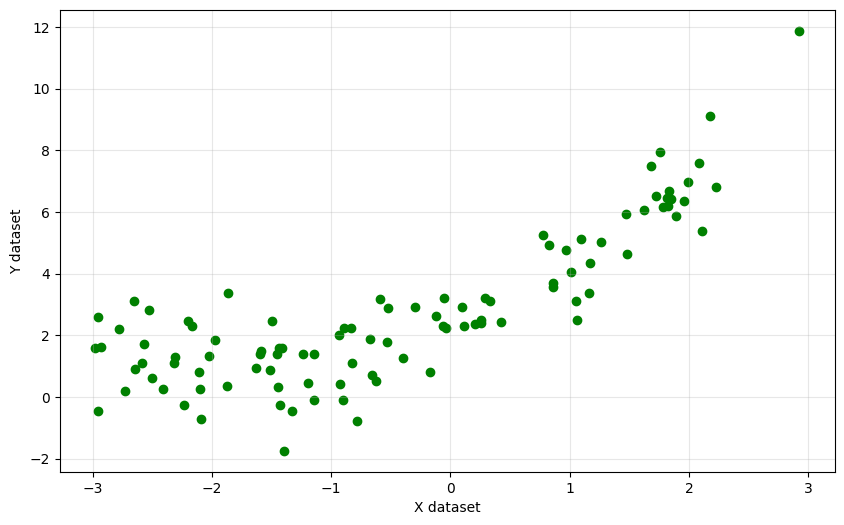

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.grid(True, alpha=.3)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [5]:
# Lets implement simple Linear Regression
from sklearn.linear_model import LinearRegression
model_1dg = LinearRegression()

In [6]:
model_1dg.fit(x_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, model_1dg.predict(x_test))
print(f"Score of Linear Regression: {score}")

Score of Linear Regression: 0.8295757458184613


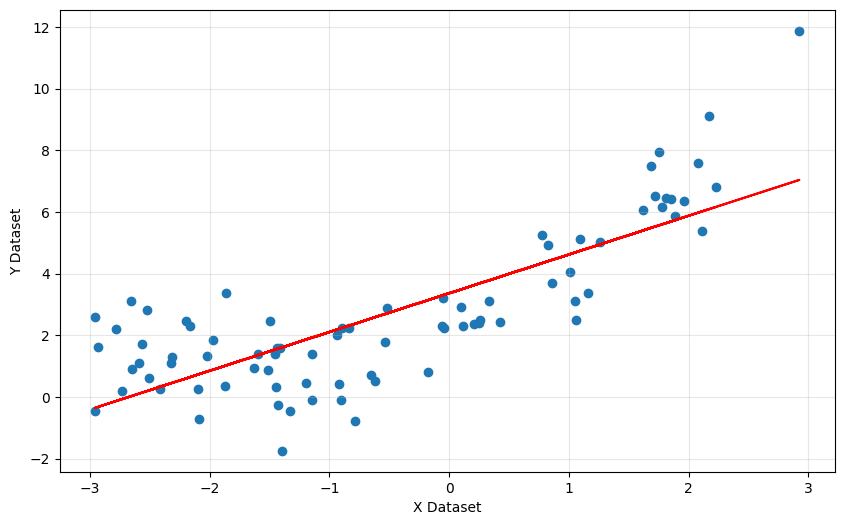

In [8]:
# Let's visualize this model
plt.figure(figsize=(10,6))
plt.plot(x_train, model_1dg.predict(x_train), color='r')
plt.scatter(x_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')
plt.grid(True, alpha=.3)
plt.show()

In [9]:
# Let's apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [11]:
x_train_poly

array([[ 1.00000000e+00,  2.07497661e-01,  4.30552793e-02],
       [ 1.00000000e+00, -1.97216826e+00,  3.88944765e+00],
       [ 1.00000000e+00,  1.72159046e+00,  2.96387373e+00],
       [ 1.00000000e+00, -8.94895733e-01,  8.00838373e-01],
       [ 1.00000000e+00, -1.45376659e+00,  2.11343730e+00],
       [ 1.00000000e+00, -1.14762787e+00,  1.31704973e+00],
       [ 1.00000000e+00, -9.22774668e-01,  8.51513088e-01],
       [ 1.00000000e+00, -2.19700843e+00,  4.82684605e+00],
       [ 1.00000000e+00, -2.92867305e+00,  8.57712584e+00],
       [ 1.00000000e+00,  3.33561081e-01,  1.11262995e-01],
       [ 1.00000000e+00,  1.05741312e+00,  1.11812250e+00],
       [ 1.00000000e+00, -1.43252472e+00,  2.05212708e+00],
       [ 1.00000000e+00, -2.09905169e+00,  4.40601798e+00],
       [ 1.00000000e+00, -9.02979879e-01,  8.15372662e-01],
       [ 1.00000000e+00, -2.58818092e+00,  6.69868047e+00],
       [ 1.00000000e+00,  1.95774662e+00,  3.83277183e+00],
       [ 1.00000000e+00, -1.44324286e+00

In [12]:
x_test_poly

array([[ 1.        ,  1.46825675,  2.15577789],
       [ 1.        , -2.98064552,  8.88424773],
       [ 1.        , -0.398554  ,  0.15884529],
       [ 1.        , -0.11848172,  0.01403792],
       [ 1.        ,  1.83084868,  3.35200688],
       [ 1.        ,  1.82214712,  3.32022011],
       [ 1.        ,  1.99412087,  3.97651803],
       [ 1.        , -1.23851642,  1.53392292],
       [ 1.        ,  0.97135821,  0.94353677],
       [ 1.        , -2.23623849,  5.00076259],
       [ 1.        ,  0.85697294,  0.73440261],
       [ 1.        , -2.10615578,  4.43589215],
       [ 1.        , -0.58883599,  0.34672782],
       [ 1.        ,  0.2872377 ,  0.0825055 ],
       [ 1.        , -0.29796354,  0.08878227],
       [ 1.        , -0.67164608,  0.45110845],
       [ 1.        , -1.58528921,  2.51314188],
       [ 1.        ,  1.1661229 ,  1.35984262],
       [ 1.        , -0.82235351,  0.6762653 ],
       [ 1.        ,  1.47874549,  2.18668821]])

In [13]:
model_2dg = LinearRegression()
model_2dg.fit(x_train_poly, y_train)
y_pred = model_2dg.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8791860832674169


In [14]:
print(model_2dg.coef_)

[[0.         1.55066717 0.48902631]]


In [15]:
print(model_2dg.intercept_)

[2.1105785]


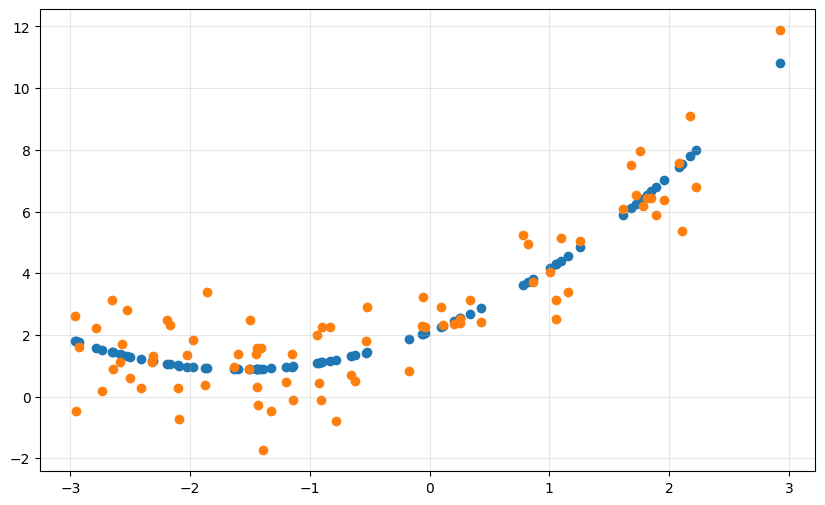

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, model_2dg.predict(x_train_poly))
plt.scatter(x_train, y_train)
plt.grid(True, alpha=.3)
plt.show()

In [17]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model_3dg = LinearRegression()
model_3dg.fit(x_train_poly, y_train)
y_pred = model_3dg.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8798484416754603


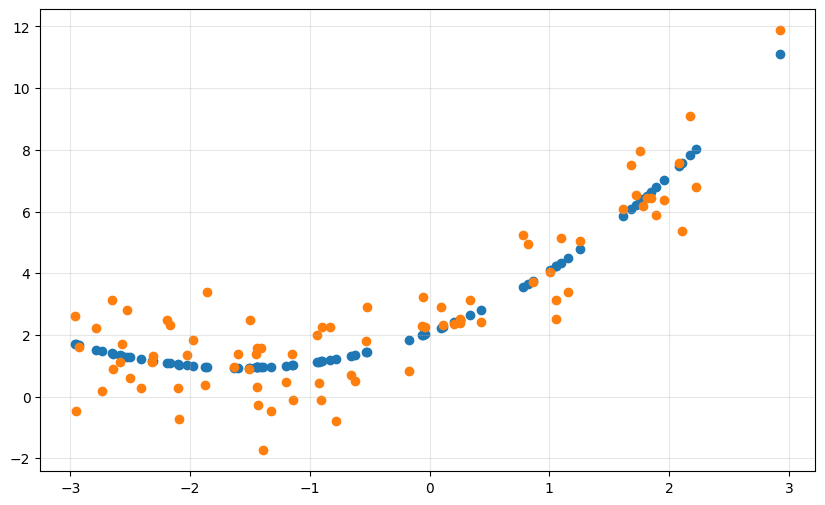

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, model_3dg.predict(x_train_poly))
plt.scatter(x_train, y_train)
plt.grid(True, alpha=.3)
plt.show()

In [19]:
# Prediction of new dataset
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

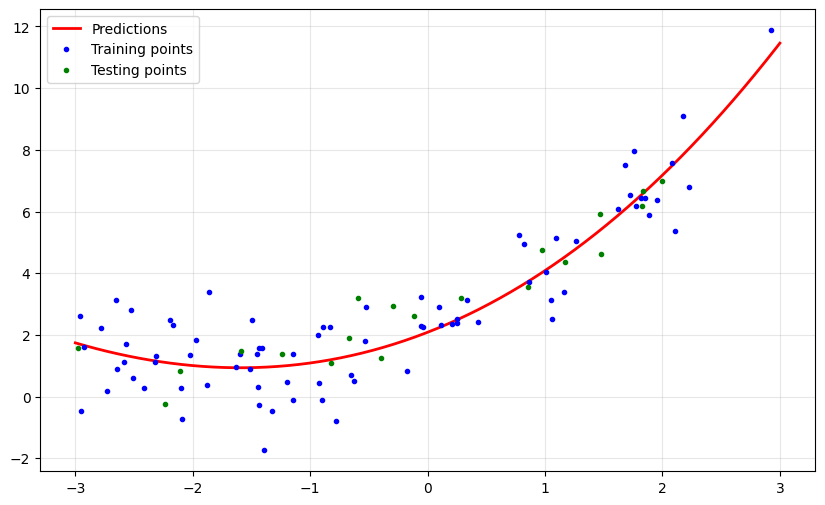

In [20]:
y_new = model_3dg.predict(x_new_poly)
plt.figure(figsize=(10,6))
plt.plot(x_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(x_train, y_train, 'b.', label='Training points')
plt.plot(x_test, y_test, 'g.', label='Testing points')
plt.grid(True, alpha=.3)
plt.legend()
plt.show()

## Pipeline Concepts

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_feature', poly_features),
        ('lin_reg', lin_reg)
    ])

    poly_regression.fit(x_train, y_train)
    y_pred_new = poly_regression.predict(x_new)

    # Plotting prediction line
    plt.plot(x_new, y_pred_new, 'r', label = f"Degree {degree}", linewidth=3)
    plt.plot(x_train, y_train, 'b.', linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=.3)
    plt.show()
    

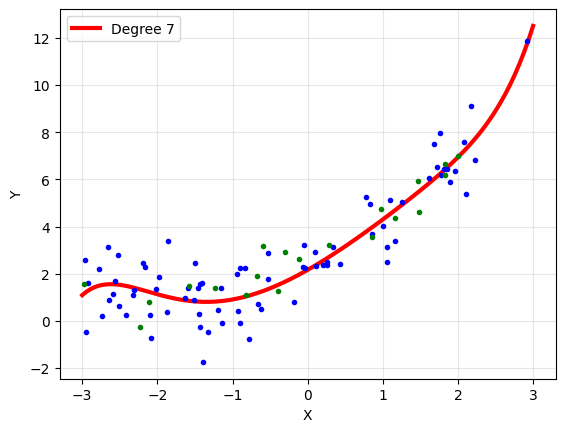

In [ ]:
poly_regression(7)